### Principal Component Analysis using Iris dataset

With an objective to increase computational efficiency while retaining most of the information, Principal Component Analysis can be used to reduce the dimension of d dimensional dataset by projecting it on a k dimensional subspace, where k < d. If there is an identifiable pattern in data(like correlation between features), it finds the direction of maximum variance in high dimensional data and projects it onto a smaller dimensional subspace while retaining most of the information. 

Finding the optimal value of k that will represent the data well is an important question in PCA.

Before jumping straight into PCA, let's load the data and perform the data preprocessing if required. The dataset from UCI machine learning repository(http://archive.ics.uci.edu/ml/datasets/Iris) will be used for this project. 


### Data Pre-processing and Checking for missing values


In [158]:
# Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [159]:
# Read the dataset using Pandas dataframe
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None,sep=',')
df.columns = ['sepal_len','sepal_width','petal_len','petal_width','class']



In [160]:
# check missing values
def check_nan(list_values):
    return sum(list_values.isnull())

#Using apply function to check missing values on every column of dataframe
print df.apply(check_nan)

sepal_len      0
sepal_width    0
petal_len      0
petal_width    0
class          0
dtype: int64


In [161]:
# Take a look the first few rows of the dataset
df.head()

,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [162]:
# Splitting the data set into features and labels
X = df.ix[:,0:4].values
y = df.ix[:,4].values

/Users/Shruti/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


### Exploratory Data Visualization

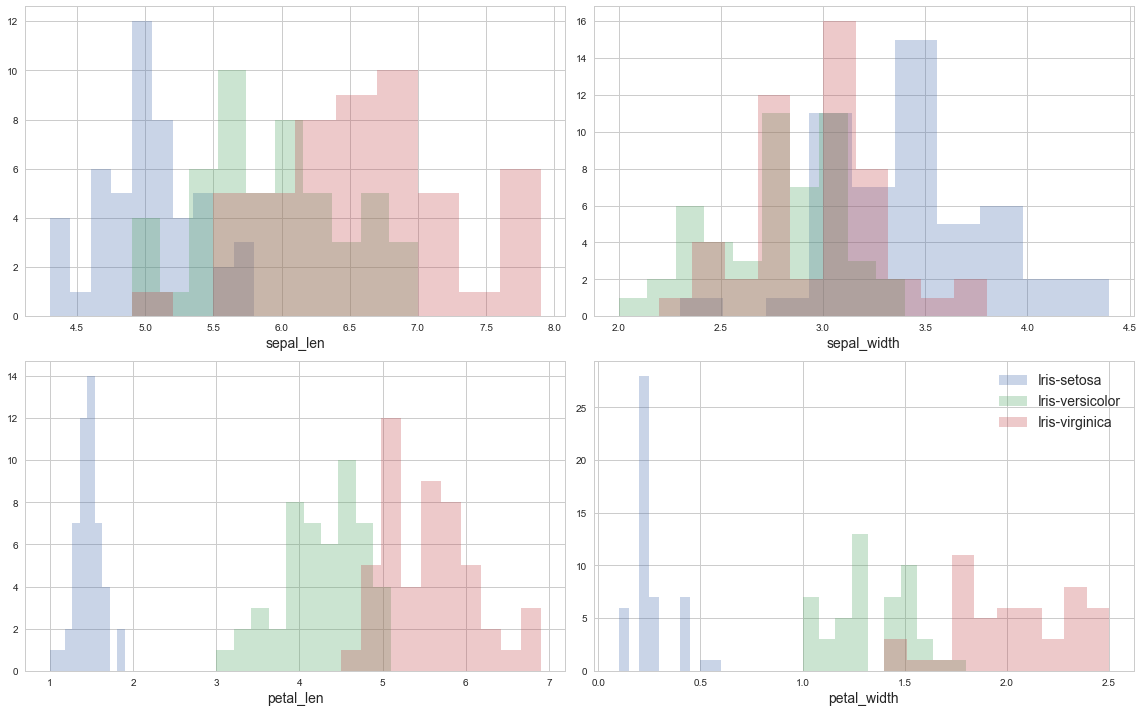

In [163]:
import math
classes = df['class'].unique()
labels = {}
for i,cl in enumerate(classes):
    labels[i+1] = cl
    
cols = ['sepal_len','sepal_width','petal_len','petal_width']
features = {}
for i, col in enumerate(cols):
    features[i] = col
    

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 10))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for cat in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==cat, cnt],
                     label=cat,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(features[cnt],fontsize=14)
    plt.legend(loc='upper right', fancybox=True, fontsize=14)

    plt.tight_layout()
    plt.show()

The plots above show the distribution of all the input features across different classes. Let's check if any correlation exists between input features.

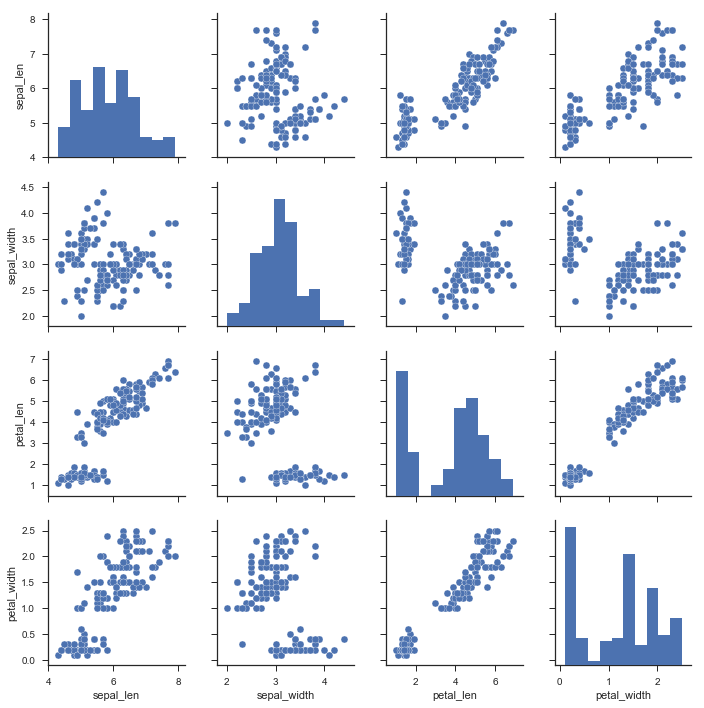

In [165]:
# Check for the correlation between input variables
sns.set(style="ticks", color_codes=True)
sns.pairplot(df)

In [166]:
print df.corr()

             sepal_len  sepal_width  petal_len  petal_width
sepal_len     1.000000    -0.109369   0.871754     0.817954
sepal_width  -0.109369     1.000000  -0.420516    -0.356544
petal_len     0.871754    -0.420516   1.000000     0.962757
petal_width   0.817954    -0.356544   0.962757     1.000000


The above correlation matrix and pair plots show clear and strong correlation between feature variables in the original data e.g : petal_width&sepal_len, petal_len&sepal_len and petal_width&petal_len. This identifiable correlation makes it clear to use PCA on this dataset to extract new feature subspace that will give minimum no. of variables with the maximum amount of variation or information about how the data is distributed.

### Dimensionality Reduction - PCA Approach



Briefly the following steps summarize PCA technique:

1. Standardize the data.
2. Calculate the eigen vectors and eigen values from covariance matrix or correlaion matrix.
3. Sort the eigenvalues in descending order and choose k eigenvectors that correspond to k largest eigenvalues where k is the number of dimensions of new feature subspace.
4. Calculate the projection matrix from selected k eigenvectors.
5. Transform the original dataset via the projection matrix to obtain a k dimensional feature subspace.



### Standardization of data


In [115]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

### Computing Eigenvalues and Eigenvectors on covariance matrix

The eigenvectors(principal components) determine the direction of new feature subspace and eigen values explain the variance of the data along the new features axes.




 


In [122]:
# Compute the covariance matrix in order to perform eigen decomposition.

# mean vector represents sample mean of each feature column in the original dataset.
mean_vector = X_std.mean(axis=0) 

# Calculate the covariance matrix
cov_matrix = (X_std-mean_vector).T.dot((X_std-mean_vector))/(X.shape[0]-1)
print "Covariance Matrix : ", cov_matrix

Covariance Matrix :  [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [126]:
# Eigendecomposition on covariance matrix
eigen_val, eigen_vec = np.linalg.eig(cov_matrix)

print "Eigen Vectors : \n%s" %eigen_vec
print "Eigen Values : \n%s" %eigen_val

Eigen Vectors : 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigen Values : 
[ 2.93035378  0.92740362  0.14834223  0.02074601]


### Sorting the eigen values

In order to determine the eigenvector(s) that need to be dropped without losing too much information for the construction of lower-dimensional subspace, we must look at the corresponding eigen values. The eigen vectors with the lowest eigen values contain the least information about the data distribution. Hence, they are ones that can be dropped.

In [129]:
# Make a tuple of eigen pairs
eigen_pairs = [(np.abs(eigen_val[i]), eigen_vec[:,i]) for i in range(len(eigen_val))]

# Sort the tuples
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

print "Eigen values in descending order : \n"
for val in eigen_pairs:
    print val

Eigen values in descending order : 

(2.930353775589317, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105]))
(0.92740362151734157, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577]))
(0.14834222648163969, array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ]))
(0.020746013995596179, array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))


### Explained Variance

After the eigen pairs are sorted, deciding upon the no. of principal components to choose becomes critical. Explained variance is a useful measure to achieve this objective as it helps us determine how much information/variance can be attributed to each of the principal component.

In [133]:
total = sum(eigen_val)
exp_variance = [(i / total)*100 for i in sorted(eigen_val, reverse=True)]
cum_exp_variance = np.cumsum(exp_variance)

Cumulative explained variance : [ 72.77045209  95.80097536  99.48480732 100.        ]


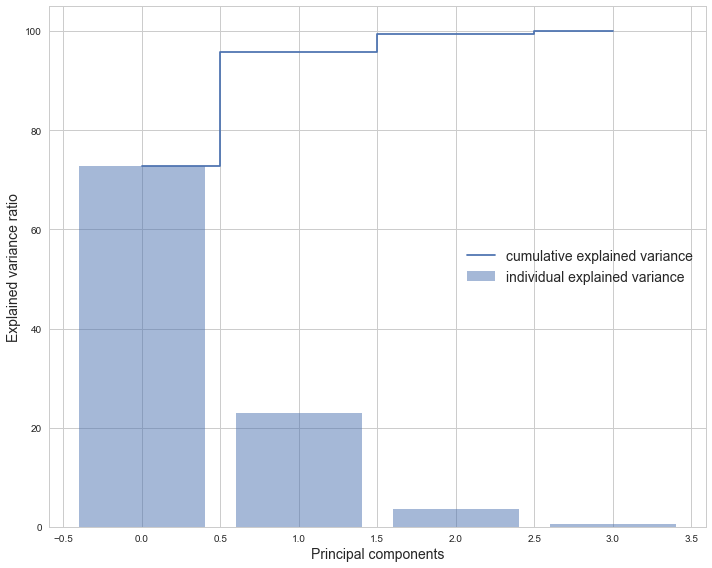

In [139]:
print "Cumulative explained variance :", cum_exp_variance

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 8))

    plt.bar(range(4), exp_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_exp_variance, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio',fontsize=14)
    plt.xlabel('Principal components',fontsize=14)
    plt.legend(loc='best',fontsize=14)
    plt.tight_layout()

The graph above shows that most of the variance(95.8%) can be explained by the first two principal components. So, they can be retained while the rest can be dropped.

### Projection Matrix

Projection matrix is the matrix of the concatenated top k eigenvectors. In this data set, we are reducing 4 dimensional feature space into 2-dimensional feature space by choosing top 2 eigen vectors with the highest eigen values.

In [149]:
# Construct the project matrix
Pro_matrix = np.hstack((eigen_pairs[0][1].reshape(4,1), 
                      eigen_pairs[1][1].reshape(4,1)))

print 'Resulting projection matrix :\n', Pro_matrix

Resulting projection matrix :
[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


### Transform the original dataset and project onto the new feature subspace

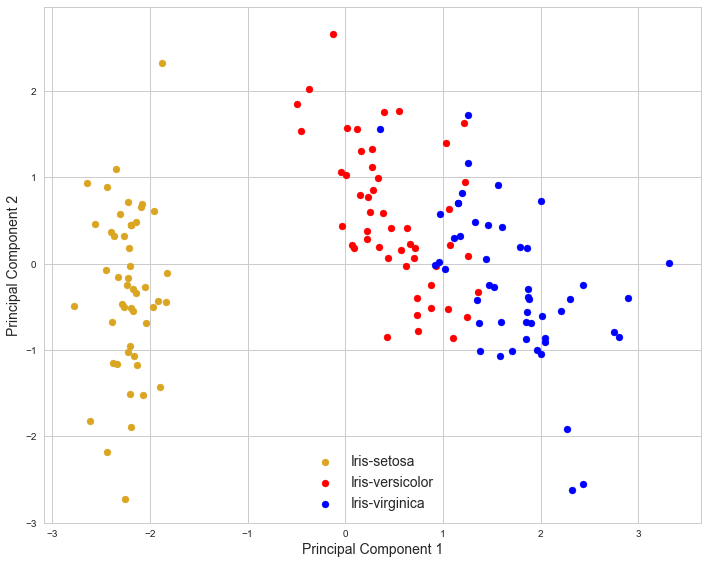

In [180]:
# Using the projection matrix obtained above transform the sample into new lower dimensional feature subspace.
Y = X_std.dot(Pro_matrix)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 8))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                        ('goldenrod', 'red', 'blue')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1',fontsize=14)
    plt.ylabel('Principal Component 2',fontsize=14)
    plt.legend(loc='lower center',fontsize=14)
    plt.tight_layout()

As PCA is an unsupervised machine learning technique, projecting the original data set onto the new 2 dimensional feature subspace gives clustering results. The scatter plot of the first two principal components separates the data points into three clusters and helps in understanding how each data point relates to the other ones and discover groups of similar ones.